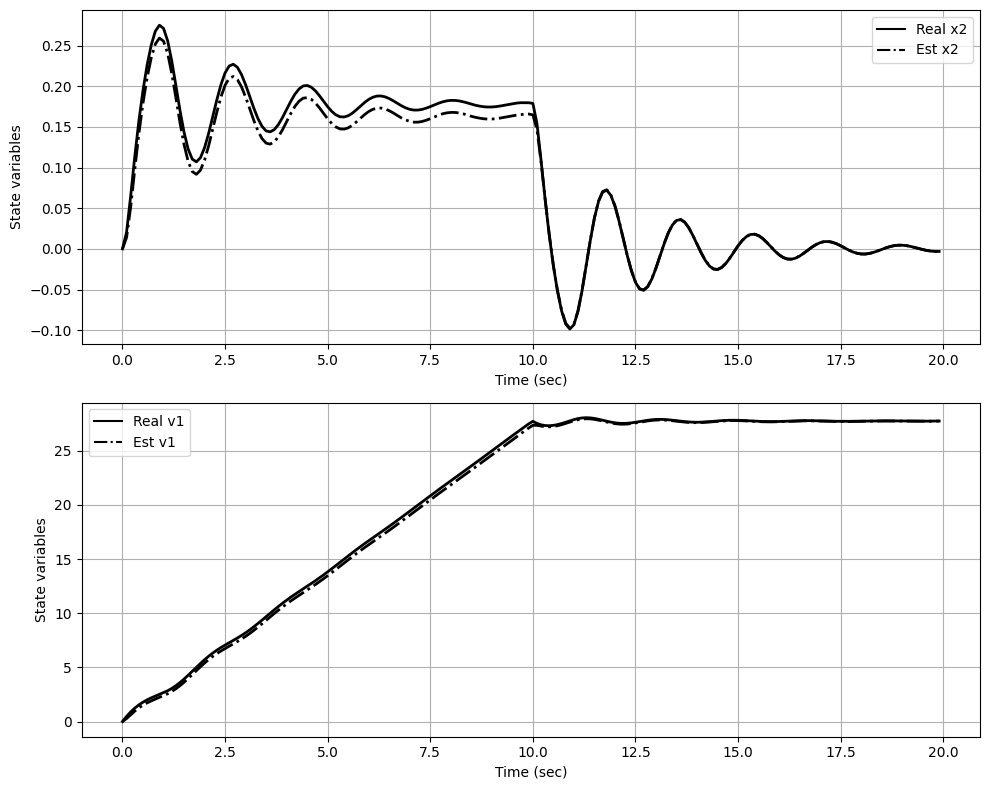

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

class Parameters:
    def __init__(self, F):
        self.F = F

# Define global parameters
Par = Parameters(F=1000)

def train_model1(t, X):
    # Extract state variables
    x = X[:10]
    xh = X[10:]

    # Real System Matrices
    A = np.array([
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, -1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, -1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, -1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, -1],
        [0, -12.5, 0, 0, 0, -0.75, 0.75, 0, 0, 0],
        [0, 62.5, -62.5, 0, 0, 3.75, -7.5, 3.75, 0, 0],
        [0, 0, 62.5, -62.5, 0, 0, 3.75, -7.5, 3.75, 0],
        [0, 0, 0, 62.5, -62.5, 0, 0, 3.75, -7.5, 3.75],
        [0, 0, 0, 0, 62.5, 0, 0, 0, 3.75, -3.75]
    ])

    b1 = np.array([0, 0, 0, 0, 0, 0.005, 0, 0, 0, 0])
    b2 = np.array([0, 0, 0, 0, 0, 250, 0, 0, 0, -1250])

    if t < 10:
        u = Par.F
        uh = 0.5 * u
    else:
        u = 0
        uh = u

    # Real System Model
    xp = A @ x + b1 * u + b2
    C = np.array([
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
    ])
    y = C @ x
    dy = np.array([y[0] - 20, y[1]])

    # Observer Matrices
    Ah = np.array([
        [0, 0, 0, 0, 1, -1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, -1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, -1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, -1],
        [-12.5, 0, 0, 0, -0.75, 0.75, 0, 0, 0],
        [62.5, -62.5, 0, 0, 3.75, -7.5, 3.75, 0, 0],
        [0, 62.5, -62.5, 0, 0, 3.75, -7.5, 3.75, 0],
        [0, 0, 62.5, -62.5, 0, 0, 3.75, -7.5, 3.75],
        [0, 0, 0, 62.5, 0, 0, 0, 3.75, -3.75]
    ])

    Bh = np.array([0, 0, 0, 0, 0.005, 0, 0, 0, 0])
    Ch = np.array([
        [1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0]
    ])

    yh = Ch @ xh
    G = np.array([
        [10.5008, 0.0472],
        [4.0624, 0.0100],
        [1.2245, 0.0004],
        [0.3222, -0.0007],
        [118.1098, 1.1441],
        [60.1867, 0.5240],
        [16.7939, 0.3003],
        [-0.0227, 0.2370],
        [-4.2587, 0.2213]
    ])

    xhp = Ah @ xh + Bh * uh + G @ (dy - yh)

    # Augment the real and estimated states
    Xp = np.concatenate((xp, xhp))

    return Xp

# Initial conditions
x0 = np.array([0, 20, 20, 20, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Time span
tspan = [0, 20]

# Solve ODE
sol = solve_ivp(train_model1, tspan, x0, method='RK23', t_eval=np.arange(0, 20, 0.1))

t = sol.t
x = sol.y.T
xh = x[:, 10:19]

# Plot results
plt.figure(figsize=(10, 8))

plt.subplot(211)
plt.plot(t, x[:, 1] - 20, 'k', label='Real x2')
plt.plot(t, xh[:, 0], 'k-.', label='Est x2')
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.setp(plt.gca().lines, linewidth=2)

plt.subplot(212)
plt.plot(t, x[:, 5], 'k', label='Real v1')
plt.plot(t, xh[:, 4], 'k-.', label='Est v1')
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.setp(plt.gca().lines, linewidth=2)

plt.tight_layout()
plt.show()
